In [2]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras import backend as K
import os
print('CONFIGURING GPU USAGE USING TENSORFLOW')
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True 

K.tensorflow_backend.set_session(tf.Session(config=config))
print('GPU INITIALIZED:',config.IsInitialized())
print('GPU CONFIGURATION:',config)
print('CONFIGURING CPU USAGE USING IPY-PARALLEL')
# rc = ipp.Client()
# ar = rc[:].apply_async(os.getpid)
# pid_map = ar.get_dict()



import keras   
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras import activations,metrics
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Dense, Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation
import matplotlib.pyplot as plt
import glob 
from keras.regularizers import l1,l2
from keras.optimizers import SGD
from subprocess import check_output
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as k
from keras.models import Model
import cv2
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import glob
from keras.utils import np_utils
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
      
from sklearn.metrics import make_scorer
    
print(config)


batch_size = 7
train_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=3,
                                                        width_shift_range=0.0025,
                                                        height_shift_range=0.025,
                                                        shear_range=0.01,
                                                        zoom_range=0.025,
                                                        channel_shift_range=0.0,
                                                        fill_mode="nearest",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        )

# valid_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=45,
#                                                         width_shift_range=0.005,
#                                                         height_shift_range=0.015,
#                                                         brightness_range=None,
#                                                         shear_range=0.09,
#                                                         zoom_range=0.145,
#                                                         channel_shift_range=0.0,
#                                                         fill_mode="constant",
#                                                         cval=0.0,
#                                                         horizontal_flip=True,
#                                                         vertical_flip=True,
#                                                         rescale= 1./255,
#                                                         preprocessing_function=None,
#                                                         data_format=None,
#                                                         validation_split=0.25,
#                                                         dtype=None,)

test_gen = keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization=False,
                                                        rotation_range=90,
                                                        width_shift_range=0.0045,
                                                        height_shift_range=0.015,
                                                        shear_range=0.02,
                                                        zoom_range=0.2400,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255)

train_generator = train_gen.flow_from_directory('clash_data/train/train/', shuffle=True, 
        target_size=(255,255),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')


test_generator = test_gen.flow_from_directory('clash_data/test/test/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

# validation_generator = valid_gen.flow_from_directory('clash_data/validation/validation/',shuffle=True,
#         target_size=(255,255),
#         batch_size=batch_size,
#         class_mode='categorical')

from keras.models import load_model
model1 = load_model('clash_baseline_opti.h5')
model1.summary()

print('Gathering score for Global Average Pooling BASELINE Neural Network')
scores1 = model1.evaluate_generator(test_generator,val_samples=25)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

print('Gathering predictions for Global Average Pooling BASELINE Neural Network')
pred1=model1.predict_generator(test_generator,val_samples=7)
pd.DataFrame(pred1.data.tolist())
    

CONFIGURING GPU USAGE USING TENSORFLOW
GPU INITIALIZED: True
GPU CONFIGURATION: gpu_options {
  per_process_gpu_memory_fraction: 0.9
  allow_growth: true
}

CONFIGURING CPU USAGE USING IPY-PARALLEL
gpu_options {
  per_process_gpu_memory_fraction: 0.9
  allow_growth: true
}

Found 160 images belonging to 11 classes.
Found 427 images belonging to 11 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 252, 252, 2)   98          convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 126,

,0,1,2,3,4,5,6,7,8,9,10
0,0.078117,0.096977,0.076997,0.101877,0.108776,0.106378,0.105492,0.077915,0.078298,0.085918,0.083256
1,0.080055,0.099499,0.079312,0.099762,0.105211,0.104515,0.104529,0.079687,0.080111,0.084649,0.082669
2,0.079705,0.099213,0.078853,0.100180,0.105957,0.104984,0.104788,0.079212,0.079752,0.084874,0.082482
3,0.078906,0.098329,0.077862,0.101085,0.107524,0.105875,0.105263,0.078340,0.078976,0.085392,0.082448
4,0.078097,0.096916,0.076981,0.101891,0.108791,0.106370,0.105485,0.077928,0.078285,0.085933,0.083324
5,0.080010,0.099466,0.079253,0.099817,0.105308,0.104578,0.104564,0.079623,0.080064,0.084678,0.082640
6,0.079551,0.099085,0.078651,0.100364,0.106285,0.105189,0.104901,0.079005,0.079594,0.084973,0.082403


1/1 [==============================] - 0s
[[0.04068502 0.05740811 0.0343891  0.14377473 0.2114333  0.15147422
  0.12035536 0.03557519 0.04073052 0.10256738 0.06160706]]
[4]
4


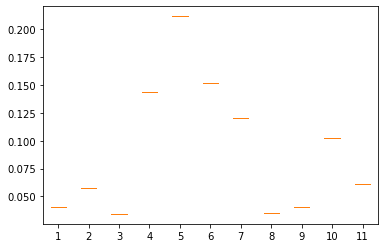

class: TownHall 8 [4]


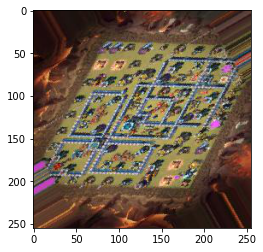

In [3]:
# from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (255,255)) 
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    x = preprocess_input(x)
    c = model1.predict_classes(x)
    m = model1.predict(x) 
    print(m)
    print(c)
    p = np.argmax(model1.predict(x)) 
    print(p)
    acc = np.mean(p == x) *100
    plt.boxplot(m)
    plt.show()
    if p==0:    
        print("class: Builder Hall {}".format(c))
    if p==1:
        print("class: Fun Bases {}".format(c))    
    if p==2:
        print("class: TownHall 6 {}".format(c))
    if p==3:    
        print("class: TownHall 7 {}".format(c))
    if p==4:
        print("class: TownHall 8 {}".format(c))     
    if p==5:
        print("class: TownHall 9 {}".format(c))
    if p==6:    
        print("class: TownHall 10  {}".format(c))
    if p==7:
        print("class: TownHall 11 {}".format(c))     
    if p==8:
        print("class: TownHall 12  {}".format(c))
    if p==9:
        print("class: TownHall 13  {}".format(c))
        
pred("clash_data/test/test/N_1_3823.jpeg")
z = plt.imread("clash_data/test/test/N_1_3823.jpeg") 
plt.imshow(z)
    

1/1 [==============================] - 0s
[[0.04659162 0.06648602 0.0401189  0.13752407 0.19299309 0.14731032
  0.12086602 0.04011498 0.04627614 0.10035616 0.06136273]]
[4]
4


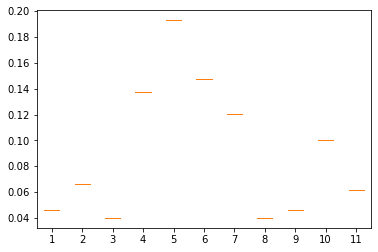

class: TownHall 8 [4]


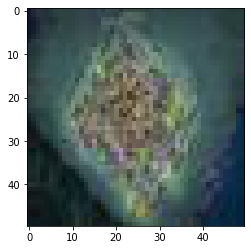

In [4]:
# with parallel_backend('ipyparallel'):
pred("clash_data/test/test/Builder_Hall/BuilderBase_Th9Farm/N_1_1665.jpeg")
x = plt.imread('clash_data/test/test/Builder_Hall/BuilderBase_Th9Farm/N_1_1665.jpeg') 
plt.imshow(x)

1/1 [==============================] - 0s
[[0.04823993 0.06602973 0.04224301 0.13580266 0.18557559 0.14269364
  0.11928976 0.04352612 0.04832063 0.10067652 0.06760243]]
[4]
4


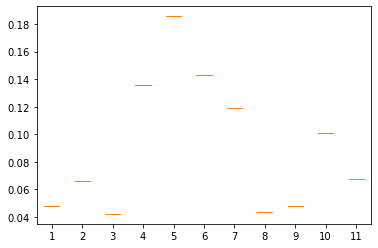

class: TownHall 8 [4]


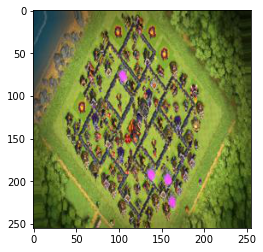

In [5]:
# with parallel_backend('ipyparallel'):
pred("clash_data/test/test/TownHall_10/N_0_4111.jpeg")
x = plt.imread('clash_data/test/test/TownHall_10/N_0_4111.jpeg') 
plt.imshow(x)